In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/cbc/cbc_updated.xlsx",sheet_name="cbc_orig")
data.head()

,OpportunityID_ren,Duplicate_Ren,ID,CBC_Flag,OpportunityID_cbc,Duplicates_CBC,DateCreated,Filename,Name,Score,...,TotalRealEstimatedBalance,TotalRevenueBalance,TotalInstallmentBalance,AvailablePercent,EligibleTradeLines,EligibleOldestTradeline,EligibleOpenTradelines,OppOwnerNumber,FundedPortfolio_YN,Liquidated_YN
0,0062M00000oZY4jQAG,False,18.0,CBC Data,0062M00000oZY4jQAG,False,2022-04-14,NaN,Miramar Biralde,568.0,...,0.0,0.0,37821.0,100.0,NaN,NaN,NaN,1.0,1.0,1.0
1,0062M00000oZaswQAC,False,21.0,CBC Data,0062M00000oZaswQAC,False,2022-04-14,NaN,Magdalena Priego Castro,556.0,...,0.0,4451.0,74816.0,29.0,NaN,NaN,NaN,1.0,1.0,1.0
2,0062M00000oYT74QAG,False,32.0,CBC Data,0062M00000oYT74QAG,False,2022-04-15,NaN,Willie Jones,529.0,...,0.0,0.0,15623.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0
3,0062M00000oZ4aLQAS,False,71.0,CBC Data,0062M00000oZ4aLQAS,False,2022-04-19,NaN,Angela Kelly,571.0,...,0.0,4546.0,25211.0,27.0,NaN,NaN,NaN,1.0,1.0,1.0
4,0062M00000oa7wMQAQ,False,82.0,CBC Data,0062M00000oa7wMQAQ,False,2022-04-19,NaN,John Williams,621.0,...,0.0,62.0,127672.0,99.0,NaN,NaN,NaN,1.0,1.0,0.0


In [ ]:
data.shape

(2764, 40)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OpportunityID_ren          2764 non-null   object        
 1   Duplicate_Ren              2764 non-null   bool          
 2   ID                         2764 non-null   float64       
 3   CBC_Flag                   2764 non-null   object        
 4   OpportunityID_cbc          2764 non-null   object        
 5   Duplicates_CBC             2764 non-null   bool          
 6   DateCreated                2764 non-null   datetime64[ns]
 7   Filename                   2512 non-null   object        
 8   Name                       2764 non-null   object        
 9   Score                      2764 non-null   float64       
 10  TotalNumberOfTrades        2764 non-null   float64       
 11  CurrentTrades              2764 non-null   float64       
 12  Unrate

In [ ]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 34 

Index(['Duplicate_Ren', 'ID', 'Duplicates_CBC', 'DateCreated', 'Score',
       'TotalNumberOfTrades', 'CurrentTrades', 'UnratedTrades',
       'CurrentNegativeTrades', 'HistoricalNegativeTrades',
       'NumberOfAccountsPaid', 'CurrentPastDue', 'AmountPastDue', 'ThirtyDays',
       'SixtyDays', 'NinetyDaysOrMore', 'Inquiries', 'InquiriesLastSixMonths',
       'PublicRecords', 'Collections', 'OldestTrade', 'AccountsBalance',
       'MonthlyPayment', 'CreditLimit', 'HighCredit',
       'TotalRealEstimatedBalance', 'TotalRevenueBalance',
       'TotalInstallmentBalance', 'AvailablePercent', 'EligibleTradeLines',
       'EligibleOpenTradelines', 'OppOwnerNumber', 'FundedPortfolio_YN',
       'Liquidated_YN'],
      dtype='object')


Categorical_attributes : 6 

Index(['OpportunityID_ren', 'CBC_Flag', 'OpportunityID_cbc', 'Filename',
       'Name', 'EligibleOldestTradeline'],
      dtype='object')


In [ ]:
# VALUES ARE DROPPED DUE TO 90 PERCENT OF MISSING VALUES AND OTHERES BASED ON DISCUSSION WITH THE CLIENT
data.drop(columns = ["OpportunityID_cbc",
                      "Duplicate_Ren", 
                      "Duplicates_CBC",
                      "ID",
                      "OppOwnerNumber",
                      "FundedPortfolio_YN",
                      "Liquidated_YN",
                      "CBC_Flag",
                      "Filename",
                      "Name",
                      "UnratedTrades",
                      "OldestTrade",
                      "EligibleOldestTradeline",
                      "EligibleOpenTradelines",
                      "PublicRecords"], axis = 1, inplace = True)

In [ ]:
data.shape

(2764, 25)

In [ ]:
data.isna().sum().sort_values(ascending = False)/len(data)*100

EligibleTradeLines           9.261939
Inquiries                    0.000000
AvailablePercent             0.000000
TotalInstallmentBalance      0.000000
TotalRevenueBalance          0.000000
TotalRealEstimatedBalance    0.000000
HighCredit                   0.000000
CreditLimit                  0.000000
MonthlyPayment               0.000000
AccountsBalance              0.000000
Collections                  0.000000
InquiriesLastSixMonths       0.000000
OpportunityID_ren            0.000000
DateCreated                  0.000000
SixtyDays                    0.000000
ThirtyDays                   0.000000
AmountPastDue                0.000000
CurrentPastDue               0.000000
NumberOfAccountsPaid         0.000000
HistoricalNegativeTrades     0.000000
CurrentNegativeTrades        0.000000
CurrentTrades                0.000000
TotalNumberOfTrades          0.000000
Score                        0.000000
NinetyDaysOrMore             0.000000
dtype: float64

In [ ]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 24 

Index(['DateCreated', 'Score', 'TotalNumberOfTrades', 'CurrentTrades',
       'CurrentNegativeTrades', 'HistoricalNegativeTrades',
       'NumberOfAccountsPaid', 'CurrentPastDue', 'AmountPastDue', 'ThirtyDays',
       'SixtyDays', 'NinetyDaysOrMore', 'Inquiries', 'InquiriesLastSixMonths',
       'Collections', 'AccountsBalance', 'MonthlyPayment', 'CreditLimit',
       'HighCredit', 'TotalRealEstimatedBalance', 'TotalRevenueBalance',
       'TotalInstallmentBalance', 'AvailablePercent', 'EligibleTradeLines'],
      dtype='object')


Categorical_attributes : 1 

Index(['OpportunityID_ren'], dtype='object')


In [ ]:
def attribute_info(df_feature):
  print('Description of attribute :', '\n' )
  print(df_feature.describe(), '\n')
  print('Value counts of attribute :', '\n' )
  print(df_feature.value_counts(), '\n')
  print('Unique number of attribute :', '\n' )
  print(df_feature.unique(), '\n')
  print('Missing values in attribute :', '\n' )
  print(df_feature.isna().sum(), '\n')
  print('Missing values in attribute_% :', '\n' )
  print(df_feature.isna().sum()/len(df_feature)*100, '\n')
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,1)
  sns.distplot(df_feature)
  plt.subplot(2,2,2)
  sns.boxplot(df_feature)
  plt.show()

In [ ]:
print(data["EligibleTradeLines"].mean())
print(data["EligibleTradeLines"].median())

19.7085326953748
17.0


attribute_name : EligibleTradeLines
Description of attribute : 

count    2508.000000
mean       19.708533
std        13.786160
min         1.000000
25%        10.000000
50%        17.000000
75%        26.000000
max       119.000000
Name: EligibleTradeLines, dtype: float64 

Value counts of attribute : 

12.0     114
10.0     111
13.0     111
7.0       95
14.0      87
        ... 
68.0       2
58.0       1
105.0      1
119.0      1
77.0       1
Name: EligibleTradeLines, Length: 73, dtype: int64 

Unique number of attribute : 

[ nan  21.  10.  18.  14.  37.  22.  15.  48.  20.  25.  19.   9.  17.
  23.  39.  16.  13.  38.   3.  43.  11.  28.   7.  53.   6.  31.  24.
  79.  29.  12.  27.  26.  40.  30.  61.   5.  93.  34.  68.  57.   1.
  32.  82.   8.   4.   2.  41. 105.  42.  33.  65.  49.  51.  35.  36.
  47.  46.  50.  59.  55.  58.  45.  52. 113.  64.  67.  44.  74.  69.
  56.  66. 119.  77.] 

Missing values in attribute : 

256 

Missing values in attribute_% : 

9.26193921852387

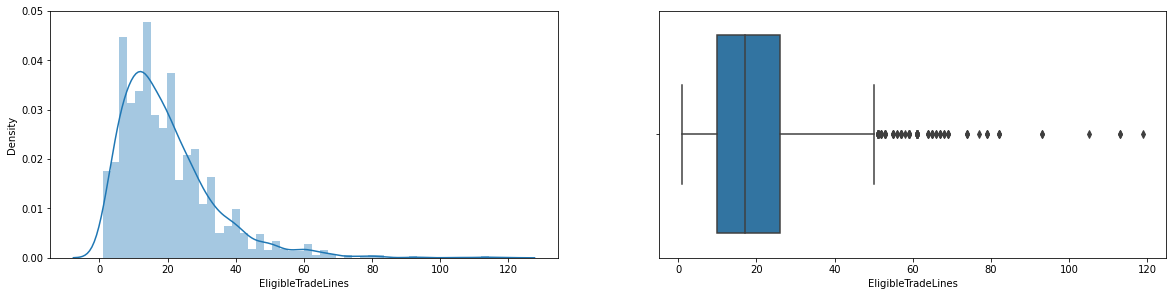

attribute_name : Inquiries
Description of attribute : 

count    2764.000000
mean       19.445369
std        15.775258
min         0.000000
25%         9.000000
50%        16.000000
75%        25.000000
max       225.000000
Name: Inquiries, dtype: float64 

Value counts of attribute : 

14.0    137
8.0     123
16.0    111
11.0    110
10.0    105
       ... 
72.0      1
93.0      1
94.0      1
82.0      1
90.0      1
Name: Inquiries, Length: 86, dtype: int64 

Unique number of attribute : 

[ 18.  29.  11.  13.  27.   6.   8.   0.   3.  16.  25.  24.  14.   9.
  17.   5.  32.  10.  23.  19.  21.  53.  46.   2.  15.  12.  22.  20.
  33.   7.  55.  30.   4.  26.  57.  31.  36.  34.  37.  73.  45.  77.
  47.   1.  28.  51.  35.  41.  38.  40.  42.  39.  62.  93.  50.  76.
  66.  48.  54.  44.  52.  65.  75.  80.  58. 216.  56.  49.  63.  78.
  43.  90.  91.  92.  64.  60.  84.  67.  74. 225.  89.  72.  61.  94.
  82.  69.] 

Missing values in attribute : 

0 

Missing values in attribute_%

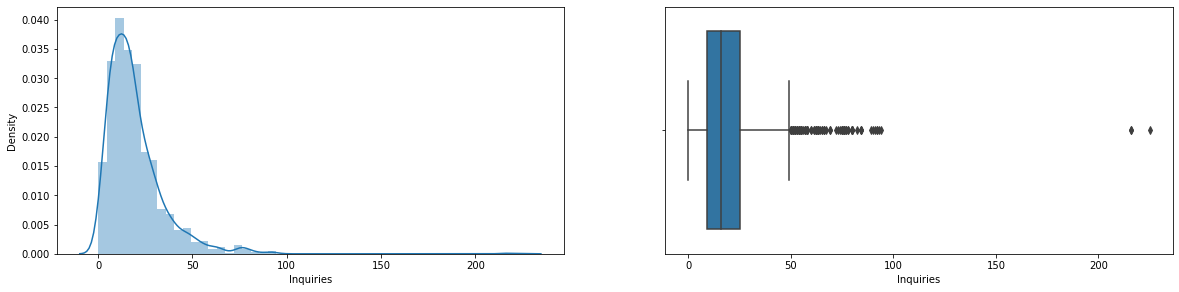

attribute_name : AvailablePercent
Description of attribute : 

count    2764.000000
mean       36.061505
std        34.514856
min         0.000000
25%         2.000000
50%        27.000000
75%        63.000000
max       100.000000
Name: AvailablePercent, dtype: float64 

Value counts of attribute : 

0.0      643
100.0    153
4.0       54
7.0       47
12.0      39
        ... 
65.0       8
76.0       8
67.0       7
72.0       7
66.0       6
Name: AvailablePercent, Length: 101, dtype: int64 

Unique number of attribute : 

[100.  29.   0.  27.  99.  15.   2.  94.  32.  69.  22.  13.  23.  43.
  12.  86.  44.  51.  81.   4.  47.  52.   5.  66.  50.  60.  16.  35.
  49.  62.  33.  20.  87.  25.  89.  90.  58.  39.  83.  57.   3.  10.
  21.  41.  74.  45.  63.  61.  75.   9.  26.  11.  56.  18.  40.  34.
  71.  53.  17.  85.  70.  93.  72.  48.   7.  59.  55.  88.  19.  68.
  92.   6.  76.  30.  73.  28.  79.  54.  64.  46.  82.  84.   1.  38.
  77.  36.  95.  31.  78.  14.  24.  42.   8. 

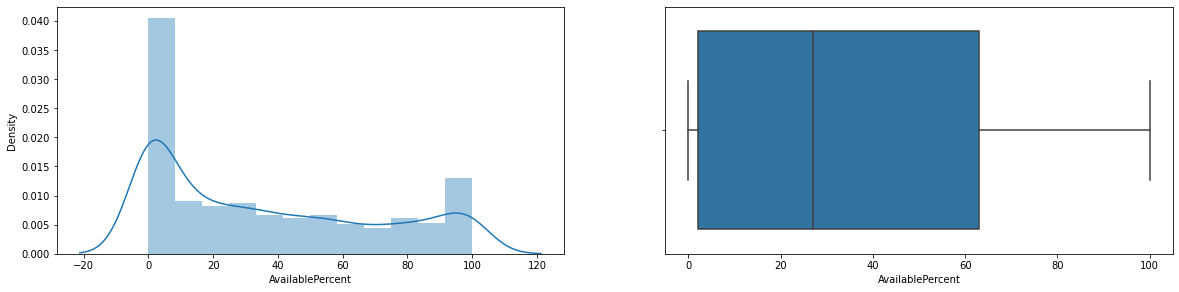

attribute_name : TotalInstallmentBalance
Description of attribute : 

count    2.764000e+03
mean     1.127266e+05
std      1.854524e+05
min      0.000000e+00
25%      8.873750e+03
50%      3.769400e+04
75%      1.260430e+05
max      1.963186e+06
Name: TotalInstallmentBalance, dtype: float64 

Value counts of attribute : 

0.0         383
219160.0      8
30754.0       7
24582.0       7
19980.0       7
           ... 
338064.0      1
71022.0       1
84935.0       1
59253.0       1
568200.0      1
Name: TotalInstallmentBalance, Length: 1451, dtype: int64 

Unique number of attribute : 

[ 37821.  74816.  15623. ...  50494.  38652. 568200.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



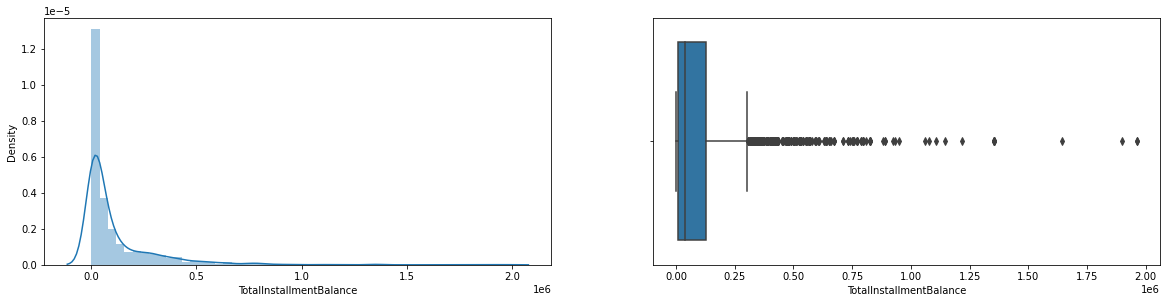

attribute_name : TotalRevenueBalance
Description of attribute : 

count    2.764000e+03
mean     1.616666e+04
std      3.906322e+04
min      0.000000e+00
25%      1.072000e+03
50%      4.776000e+03
75%      1.686500e+04
max      1.225119e+06
Name: TotalRevenueBalance, dtype: float64 

Value counts of attribute : 

0.0        233
296.0        9
68957.0      8
3957.0       7
2547.0       7
          ... 
5323.0       1
20746.0      1
6402.0       1
595.0        1
74422.0      1
Name: TotalRevenueBalance, Length: 1465, dtype: int64 

Unique number of attribute : 

[    0.  4451.  4546. ...  8756.   350. 74422.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



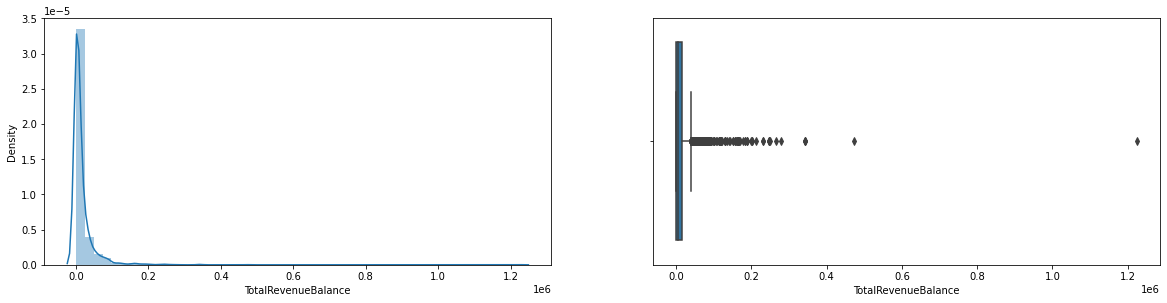

attribute_name : TotalRealEstimatedBalance
Description of attribute : 

count    2.764000e+03
mean     6.508843e+04
std      1.623458e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.897757e+06
Name: TotalRealEstimatedBalance, dtype: float64 

Value counts of attribute : 

0.0          2095
260516.0        7
405401.0        6
1273584.0       6
313337.0        6
             ... 
519688.0        1
159451.0        1
477146.0        1
5378.0          1
554445.0        1
Name: TotalRealEstimatedBalance, Length: 396, dtype: int64 

Unique number of attribute : 

[      0.   17981.  184253.  163471.  497367. 1025742.  630514.   71844.
  337295.  291913.  134666.  793188.  479781.  253054.  229239.  202716.
  692113.  451665.   98574.  105014.  450961.  298444.  284759.  492047.
  116564.   23882.  104235.   75076.  297898.  334398.  381240.  175310.
  115531.   15788.  259679.  188237.  540820.  405163.  125144.  477716.
  620169.  459854

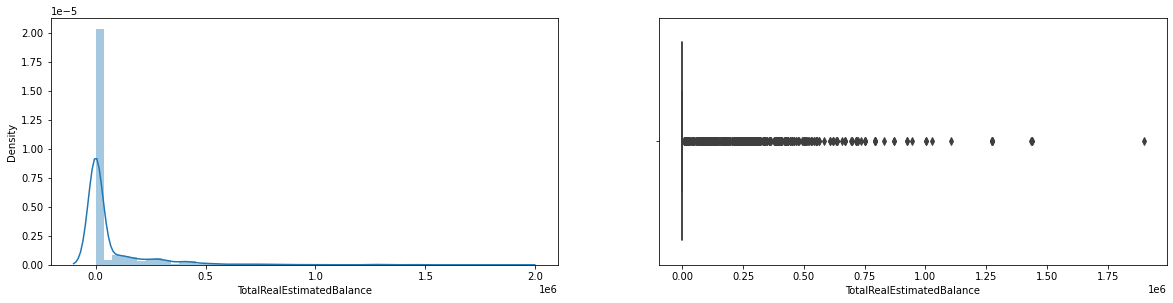

attribute_name : HighCredit
Description of attribute : 

count    2.764000e+03
mean     3.860617e+05
std      6.650303e+05
min      0.000000e+00
25%      6.296600e+04
50%      1.436950e+05
75%      4.363650e+05
max      9.434234e+06
Name: HighCredit, dtype: float64 

Value counts of attribute : 

0.0          13
4522.0        9
766641.0      8
2322689.0     7
49767.0       7
             ..
247422.0      1
9921.0        1
263295.0      1
497775.0      1
1282127.0     1
Name: HighCredit, Length: 1663, dtype: int64 

Unique number of attribute : 

[5.095500e+04 1.009190e+05 1.648350e+05 ... 3.795680e+05 4.930000e+02
 1.282127e+06] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



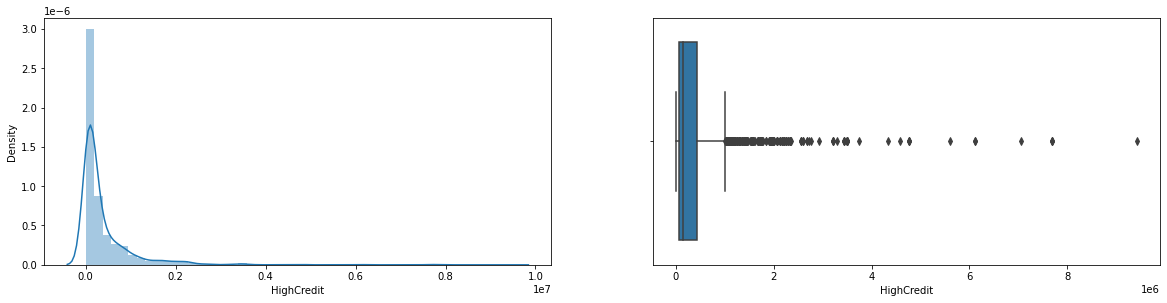

attribute_name : CreditLimit
Description of attribute : 

count    2.764000e+03
mean     2.177611e+04
std      5.400827e+04
min      0.000000e+00
25%      1.150000e+03
50%      5.800000e+03
75%      2.170000e+04
max      1.288222e+06
Name: CreditLimit, dtype: float64 

Value counts of attribute : 

0.0        331
300.0       65
1000.0      42
800.0       35
500.0       35
          ... 
7270.0       1
13220.0      1
4775.0       1
3041.0       1
92574.0      1
Name: CreditLimit, Length: 835, dtype: int64 

Unique number of attribute : 

[3.000000e+02 2.340000e+03 0.000000e+00 3.500000e+03 7.500000e+03
 6.250000e+02 2.000000e+03 1.425000e+03 4.900000e+03 3.682500e+04
 5.010000e+02 1.361000e+04 1.323100e+04 7.960000e+03 1.050000e+04
 4.200000e+03 1.280000e+04 1.900000e+03 2.145000e+04 1.734000e+04
 4.000000e+03 6.400000e+03 3.450000e+03 6.195000e+04 1.095100e+04
 4.500000e+03 1.395000e+04 1.950000e+03 2.095000e+04 4.300000e+03
 4.749000e+03 8.112500e+04 4.350000e+03 8.200000e+04 6.040000

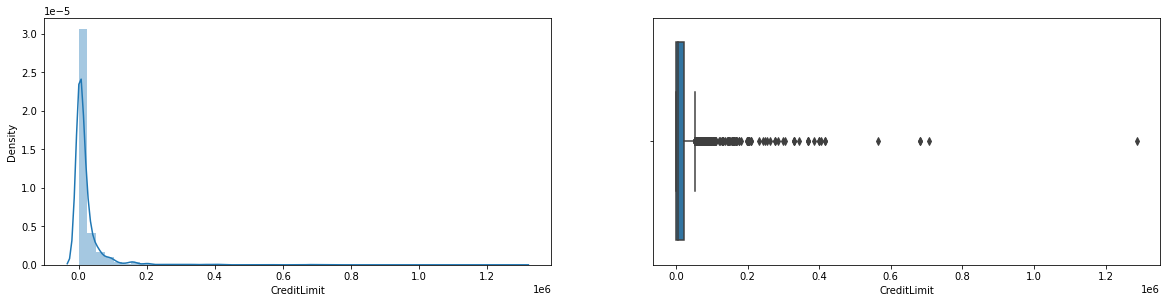

attribute_name : MonthlyPayment
Description of attribute : 

count     2764.000000
mean      1811.368307
std       2594.173458
min          0.000000
25%        480.750000
50%       1076.000000
75%       2320.000000
max      76250.000000
Name: MonthlyPayment, dtype: float64 

Value counts of attribute : 

0.0       153
25.0       16
30.0       14
45.0       11
724.0      10
         ... 
1198.0      1
1052.0      1
3381.0      1
1596.0      1
2343.0      1
Name: MonthlyPayment, Length: 1270, dtype: int64 

Unique number of attribute : 

[ 612. 1721.  799. ... 2730. 2702. 2343.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



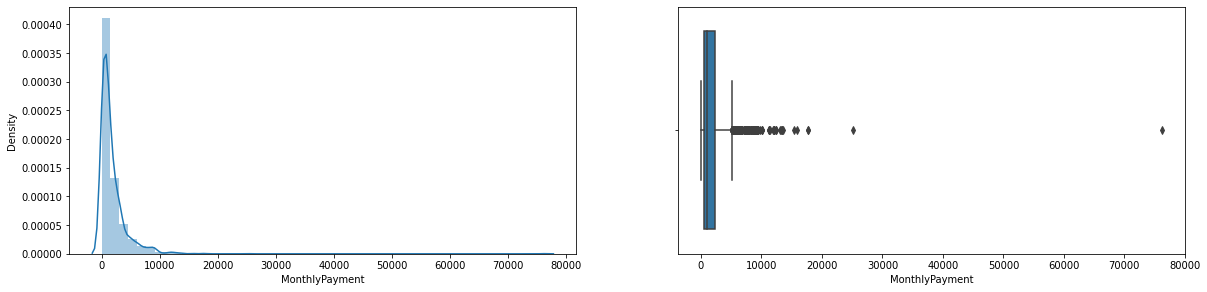

attribute_name : AccountsBalance
Description of attribute : 

count    2.764000e+03
mean     1.386037e+05
std      2.019103e+05
min      0.000000e+00
25%      2.698700e+04
50%      6.120400e+04
75%      1.639188e+05
max      3.122876e+06
Name: AccountsBalance, dtype: float64 

Value counts of attribute : 

0.0         22
2279.0      13
309462.0     8
24095.0      7
5956.0       7
            ..
8579.0       1
70383.0      1
295641.0     1
128639.0     1
642790.0     1
Name: AccountsBalance, Length: 1664, dtype: int64 

Unique number of attribute : 

[5.60370e+04 7.92670e+04 1.03507e+05 ... 4.74080e+04 3.50000e+02
 6.42790e+05] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



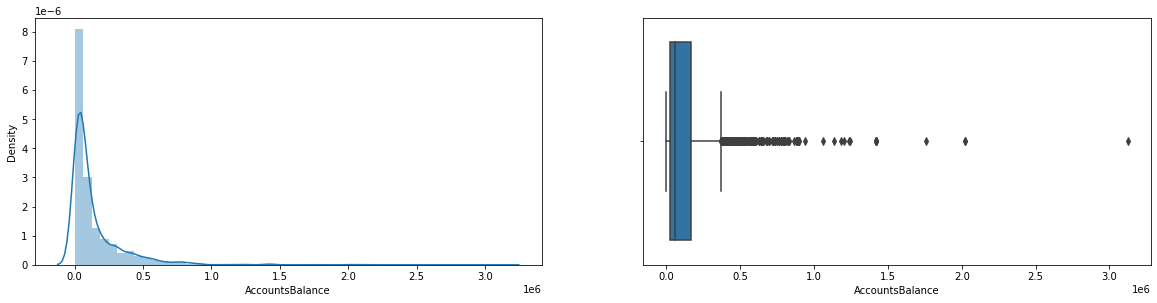

attribute_name : Collections
Description of attribute : 

count    2764.000000
mean        1.876628
std         2.988634
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        45.000000
Name: Collections, dtype: float64 

Value counts of attribute : 

0.0     1187
1.0      529
2.0      326
3.0      239
4.0      162
6.0       81
5.0       68
7.0       44
8.0       30
9.0       30
10.0      12
12.0      12
20.0      10
11.0       9
13.0       5
14.0       5
15.0       5
19.0       4
17.0       2
31.0       1
16.0       1
45.0       1
22.0       1
Name: Collections, dtype: int64 

Unique number of attribute : 

[ 2.  0.  3.  1.  5.  4. 10.  6. 13.  7.  8. 31. 15.  9. 11. 12. 45. 16.
 19. 14. 20. 17. 22.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



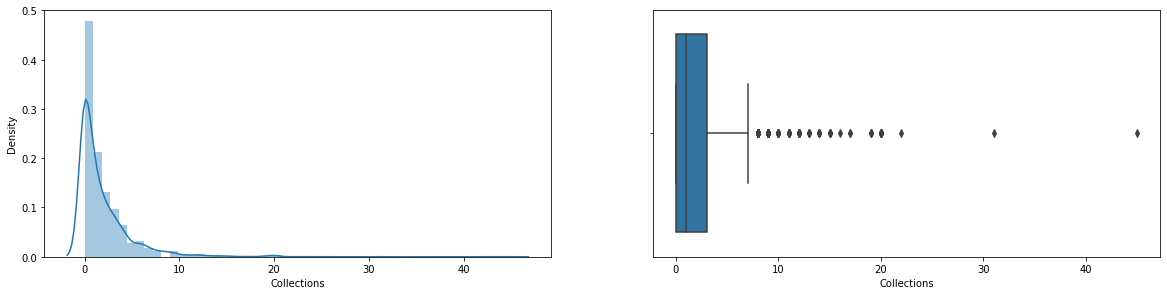

attribute_name : InquiriesLastSixMonths
Description of attribute : 

count    2764.000000
mean        5.649421
std         5.839613
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        65.000000
Name: InquiriesLastSixMonths, dtype: float64 

Value counts of attribute : 

3.0     360
1.0     345
2.0     327
4.0     253
0.0     239
5.0     202
6.0     181
7.0     145
8.0     124
9.0     101
10.0     91
11.0     67
12.0     54
14.0     42
16.0     40
15.0     36
13.0     35
17.0     18
20.0     13
26.0     11
22.0      9
27.0      8
24.0      8
37.0      7
19.0      7
23.0      7
21.0      6
18.0      6
25.0      5
32.0      4
34.0      4
28.0      3
44.0      2
29.0      2
65.0      2
Name: InquiriesLastSixMonths, dtype: int64 

Unique number of attribute : 

[ 5. 22.  2.  6.  8.  0.  1.  7. 20.  3. 11. 16.  9. 10.  4. 12. 14. 21.
 13. 32. 18. 15. 17. 19. 28. 26. 27. 23. 24. 25. 37. 44. 34. 29. 65.] 

Missing values in attribute : 

0 

Missing v

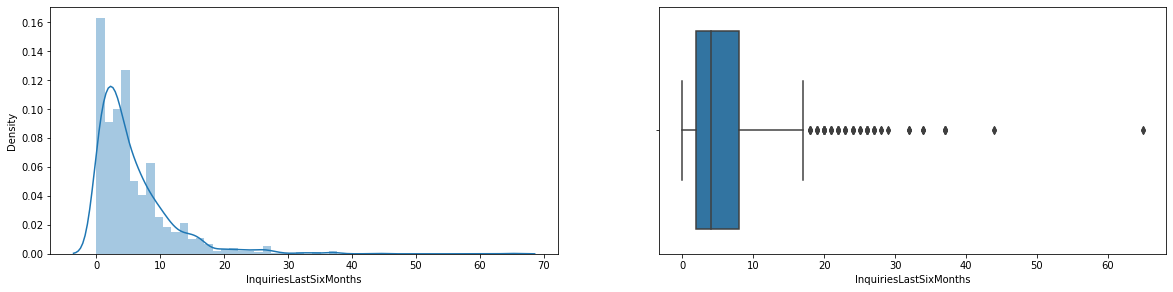

attribute_name : OpportunityID_ren
Description of attribute : 

count                   2764
unique                  2764
top       0062M00000oZY4jQAG
freq                       1
Name: OpportunityID_ren, dtype: object 

Value counts of attribute : 

0062M00000oZY4jQAG    1
0062M00000k0sMZQAY    1
0062M00000jziPCQAY    1
0062M00000jzmiqQAA    1
0062M00000jzOlIQAU    1
                     ..
0062M00000mTxmNQAS    1
0062M00000mTxnLQAS    1
0062M00000mU5dqQAC    1
0062M00000mU9DhQAK    1
0062M00000oQCU7QAO    1
Name: OpportunityID_ren, Length: 2764, dtype: int64 

Unique number of attribute : 

['0062M00000oZY4jQAG' '0062M00000oZaswQAC' '0062M00000oYT74QAG' ...
 '0062M00000oARbzQAG' '0062M00000oBcYSQA0' '0062M00000oQCU7QAO'] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



ValueError: ignored

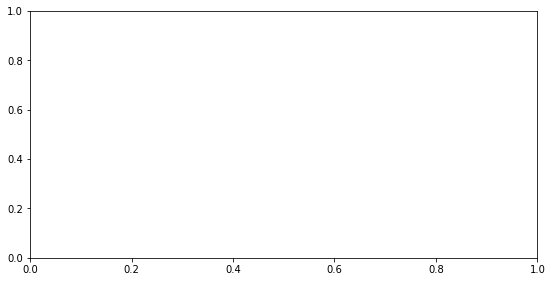

In [ ]:
analysing_attributes = ["EligibleTradeLines",
                        "Inquiries",                    
                        "AvailablePercent",             
                        "TotalInstallmentBalance",      
                        "TotalRevenueBalance",          
                        "TotalRealEstimatedBalance",    
                        "HighCredit",                   
                        "CreditLimit",                  
                        "MonthlyPayment",               
                        "AccountsBalance",              
                        "Collections",                  
                        "InquiriesLastSixMonths",       
                        "OpportunityID_ren",            
                        "DateCreated",                  
                        "SixtyDays",                    
                        "ThirtyDays",                  
                        "AmountPastDue",                
                        "CurrentPastDue",               
                        "NumberOfAccountsPaid",         
                        "HistoricalNegativeTrades",     
                        "CurrentNegativeTrades",        
                        "CurrentTrades",                
                        "TotalNumberOfTrades",          
                        "Score",                        
                        "NinetyDaysOrMore"]       

for col in analysing_attributes:
  print('\033[1m'+'attribute_name :', col+'\033[0m')
  attribute_info(data[col])

In [ ]:
data["EligibleTradeLines"].fillna(data["EligibleTradeLines"].median(), inplace = True)

In [ ]:
data.isna().sum().sort_values(ascending = False)/len(data)*100

OpportunityID_ren            0.0
Inquiries                    0.0
AvailablePercent             0.0
TotalInstallmentBalance      0.0
TotalRevenueBalance          0.0
TotalRealEstimatedBalance    0.0
HighCredit                   0.0
CreditLimit                  0.0
MonthlyPayment               0.0
AccountsBalance              0.0
Collections                  0.0
InquiriesLastSixMonths       0.0
NinetyDaysOrMore             0.0
DateCreated                  0.0
SixtyDays                    0.0
ThirtyDays                   0.0
AmountPastDue                0.0
CurrentPastDue               0.0
NumberOfAccountsPaid         0.0
HistoricalNegativeTrades     0.0
CurrentNegativeTrades        0.0
CurrentTrades                0.0
TotalNumberOfTrades          0.0
Score                        0.0
EligibleTradeLines           0.0
dtype: float64

In [ ]:
data.to_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/cbc/cbc_after_eda.xlsx', index = False)